In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_habits_performance.csv')

#20.Are there patterns indicating burnout (e.g., low sleep_hours, high study_hours, low mental_health_rating)?

In [14]:
burnout_df = df[
    (df['study_hours_per_day'] >= 6) &
    (df['sleep_hours'] <= 5) &
    (df['mental_health_rating'] <= 4)
]

print(f"Number of potential burnout cases: {len(burnout_df)}")
burnout_df[['student_id', 'study_hours_per_day', 'sleep_hours', 'mental_health_rating']]

Number of potential burnout cases: 3


,student_id,study_hours_per_day,sleep_hours,mental_health_rating
606,S1606,6.8,4.4,4
866,S1866,6.2,3.7,4
875,S1875,7.6,4.8,3


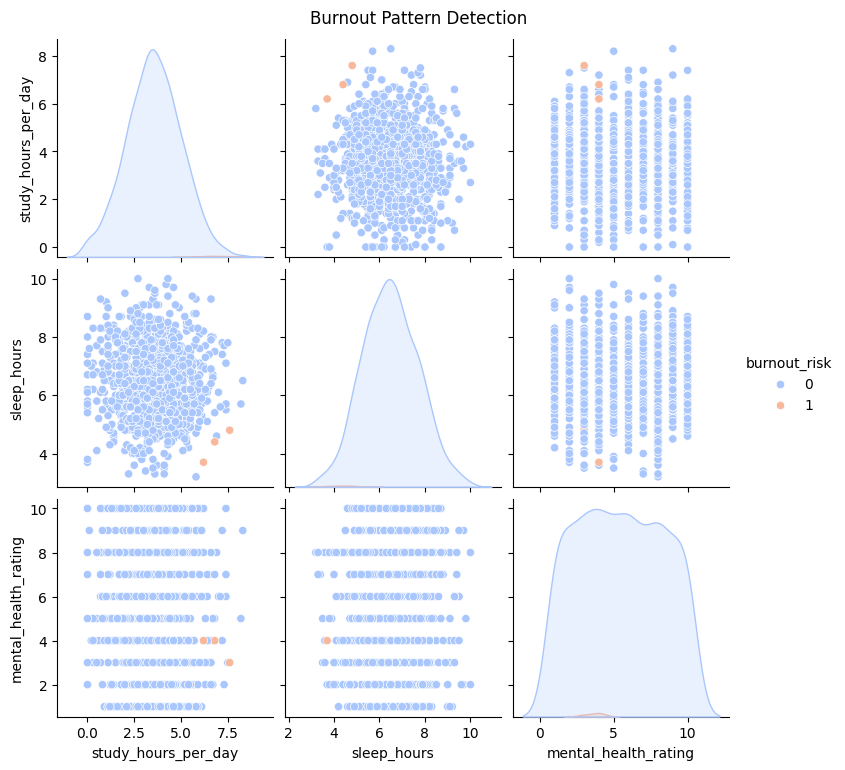

In [20]:
df['burnout_risk'] = ((df['study_hours_per_day'] >= 6) &
                      (df['sleep_hours'] <= 5) &
                      (df['mental_health_rating'] <= 4)).astype(int)

sns.pairplot(df, vars=['study_hours_per_day', 'sleep_hours', 'mental_health_rating'], hue='burnout_risk', palette='coolwarm')
plt.suptitle('Burnout Pattern Detection', y= 1.02)
plt.show()

#21.What lifestyle patterns do top scorers (e.g., exam_score > 90) follow?

In [22]:
top_scorers = df[df['exam_score'] > 90]
print(f"Top Scorers Count: {len(top_scorers)}")

Top Scorers Count: 125


In [23]:
lifestyle_cols = ['study_hours_per_day', 'sleep_hours', 'social_media_hours',
                  'netflix_hours', 'diet_quality', 'exercise_frequency',
                  'mental_health_rating', 'attendance_percentage']


In [24]:
top_avg = top_scorers[lifestyle_cols].copy()
rest_avg = df[df['exam_score'] <=90][lifestyle_cols].copy()

top_avg['diet_quality'] = top_avg['diet_quality'].map({'Poor': 1, 'Average': 2, 'Good': 3})
top_avg['exercise_frequency'] = top_avg['exercise_frequency'].map({'Never': 1, 'Sometimes': 2, 'Regularly': 3})

rest_avg['diet_quality'] = rest_avg['diet_quality'].map({'Poor': 1, 'Average': 2, 'Good': 3})
rest_avg['exercise_frequency'] = rest_avg['exercise_frequency'].map({'Never': 1, 'Sometimes': 2,'Regularly': 3})

In [25]:
avg_comparison = pd.DataFrame({
    'Top Scorers': top_avg.mean(),
    'Other Students': rest_avg.mean()
})

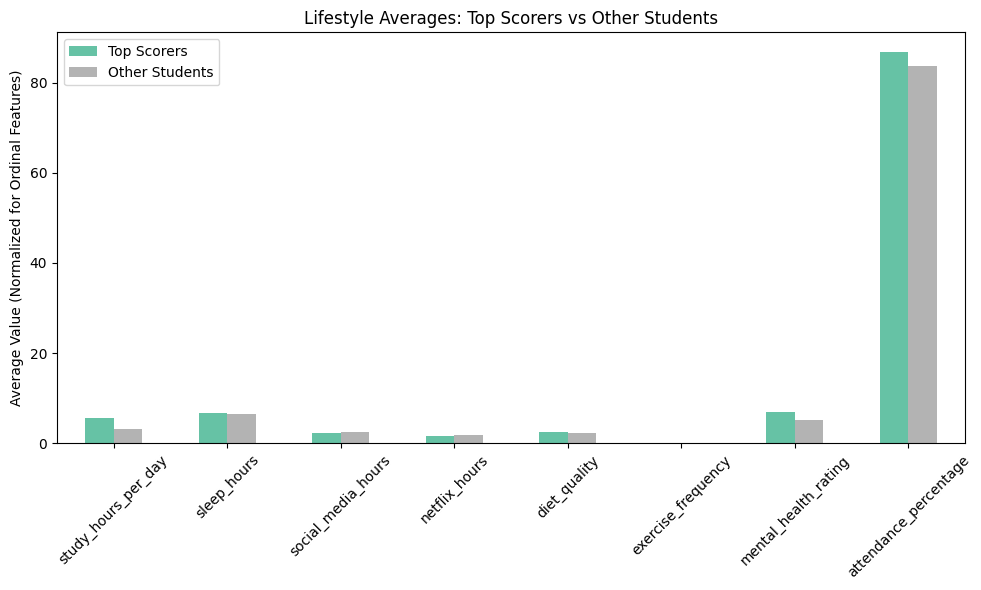

In [27]:
avg_comparison.plot(kind= 'bar', figsize=(10,6), colormap= 'Set2')
plt.title('Lifestyle Averages: Top Scorers vs Other Students')
plt.ylabel('Average Value (Normalized for Ordinal Features)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()